# PART I: Having a look at local area distribution

## CONTENT

1. [**COUNCIL AREA DISTRIBUTION**](#2)
2. [**REGION DISTRIBUTION**](#3)
3. [**SUBURB DISTRIBUTION**](#4)
4. [**PATTERN**](#5)

<a class="anchor" id="1"></a>
## Which Council area has more trading records?

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__author__ = "Ya Yu Chen"
__email__ = "a725761@gmail.com"

In [51]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [52]:
raw_df = pd.read_csv('melb_data_with_correct_council.csv')
df = raw_df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Melbourne,902/16 Liverpool St,1,u,427000,S,Harcourts,3/12/2016,2.8,3000,1,1,0.0,0,NaN,NaN,Melbourne,-37.8111,144.9715,Northern Metropolitan,17496
1,Melbourne,14/2 Exhibition St,2,u,1160500,S,Kay,4/03/2017,2.8,3000,2,2,1.0,4230,NaN,2006.0,Melbourne,-37.8157,144.9727,Northern Metropolitan,17496
2,Melbourne,2306/265 Exhibition St,2,u,780000,SP,Galldon,4/06/2016,2.8,3000,2,2,1.0,0,85.0,1997.0,Melbourne,-37.8095,144.9691,Northern Metropolitan,17496
3,Melbourne,1501/87 Franklin St,2,u,535000,S,HAR,7/05/2016,2.8,3000,2,1,1.0,0,84.0,2001.0,Melbourne,-37.8080,144.9617,Northern Metropolitan,17496
4,Melbourne,3811/80 Abeckett St,2,u,450000,VB,MICM,7/11/2016,2.8,3000,2,1,1.0,0,55.0,2014.0,Melbourne,-37.8091,144.9609,Northern Metropolitan,17496


In [53]:
df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [5]:
# remove properties which is not located at Metropolitan
df_metro = df.query("Regionname not in ('Eastern Victoria', 'Northern Victoria', 'Western Victoria')")
df_metro.shape

(13454, 21)

<a class="anchor" id="2"></a>
## Council area distribution in Metropolitan

<AxesSubplot:>

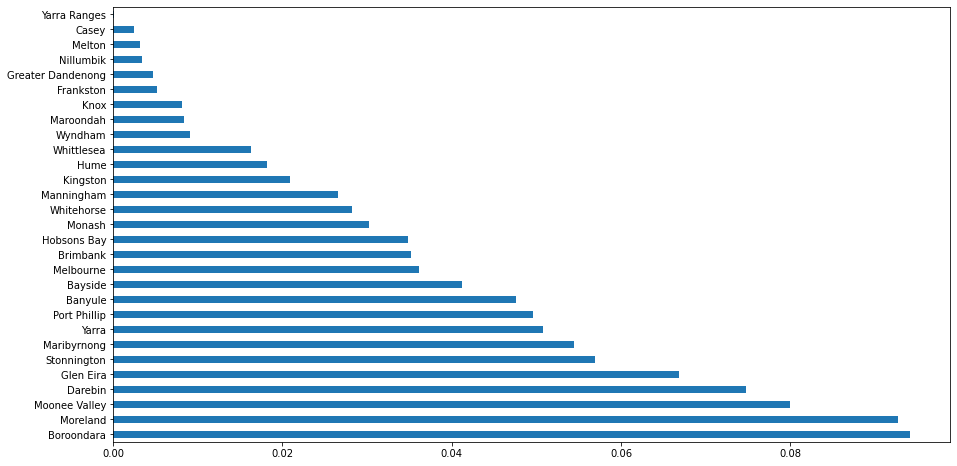

In [10]:
coun_count = df_metro.CouncilArea.value_counts()
(coun_count / df_metro.shape[0]).plot(kind='barh', figsize=(15,8))

In [25]:
coun_count.index[(coun_count.values / df_metro.shape[0]) > 0.05]

Index(['Boroondara', 'Moreland', 'Moonee Valley', 'Darebin', 'Glen Eira',
       'Stonnington', 'Maribyrnong', 'Yarra'],
      dtype='object')

Only **BOROONDARA, MORELAND, MOONEE VALLEY, DAREBIN, GLEN EIRA, STONNINGTON, MARIBYRNONG and YARRA** has more property sales records in Melbourne metropolitan.

In [27]:
# divide council area which proportion over/less 5%
coun_over_5 = df_metro.query("CouncilArea in ('Boroondara', 'Moreland', 'Moonee Valley', 'Darebin', 'Glen Eira', 'Stonnington', 'Maribyrnong', 'Yarra')")
coun_less_5 = df_metro.query("CouncilArea not in ('Boroondara', 'Moreland', 'Moonee Valley', 'Darebin', 'Glen Eira', 'Stonnington', 'Maribyrnong', 'Yarra')")
print(coun_over_5.shape)
print(coun_less_5.shape)

(7677, 21)
(5777, 21)


<a class="anchor" id="3"></a>
## Region distribution - according to 2 different council groups 

### Over 5% group

<AxesSubplot:title={'center':'Percent of Region(OVER)'}>

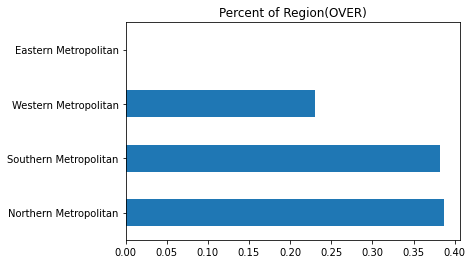

In [34]:
reg_over = coun_over_5.Regionname.value_counts()
(reg_over / coun_over_5.shape[0]).plot(kind='barh', title='Percent of Region(OVER)')

### Average Price for different Region

<AxesSubplot:title={'center':'Average Price of Region(OVER)'}, ylabel='Regionname'>

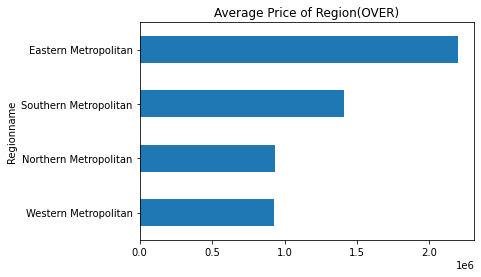

In [55]:
reg_group = coun_over_5.groupby(by='Regionname')['Price'].mean()
reg_group.sort_values(ascending=True).plot(kind='barh', title='Average Price of Region(OVER)')

In Percentage plot, **EASTERN** has few records only, but it has **DOUBLE HIGHER PRICE** than **NORTHERN**.  

### Less 5% group

<AxesSubplot:title={'center':'Percent of Region(LESS)'}>

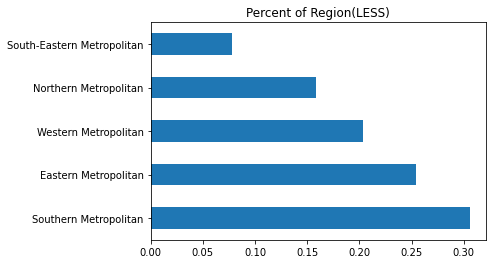

In [36]:
reg_less = coun_less_5.Regionname.value_counts()
(reg_less / coun_less_5.shape[0]).plot(kind='barh', title='Percent of Region(LESS)')

### Average Price for different Region

<AxesSubplot:title={'center':'Average Price of Region(LESS)'}, ylabel='Regionname'>

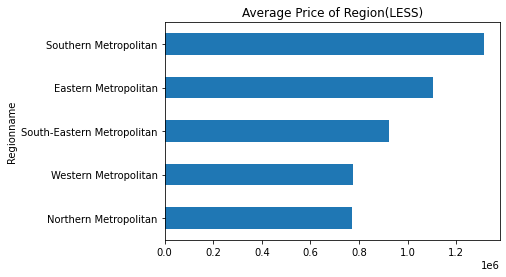

In [39]:
reg_group_less = coun_less_5.groupby(by='Regionname')['Price'].mean()
reg_group_less.sort_values(ascending=True).plot(kind='barh', title='Average Price of Region(LESS)')

In **LESS** group, the result of **AVERAGE PRICE** is **OPPOSITE**. **SOUTHERN** has more records, also has the highest price.

<a class="anchor" id="4"></a>
## Suburb distribution - according to 2 different council groups

### Over 5% group

<AxesSubplot:title={'center':'Percent of Suburb(OVER)'}>

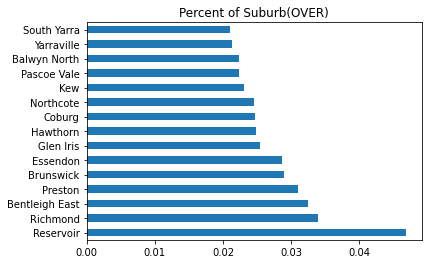

In [41]:
sub_over = coun_over_5.Suburb.value_counts()
(sub_over[:15] / coun_over_5.shape[0]).plot(kind='barh', title='Percent of Suburb(OVER)')

Only **RESERVOIR** has more records which is **OVER 4%**.

### Average Price for different Suburb

<AxesSubplot:title={'center':'Average Price of Suburb(OVER)'}, ylabel='Suburb'>

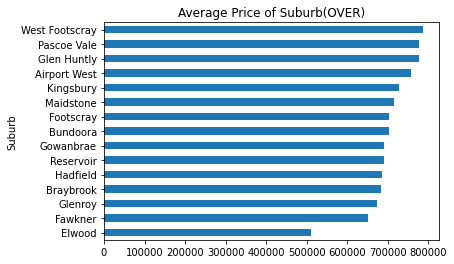

In [43]:
sub_group = coun_over_5.groupby(by='Suburb')['Price'].mean()
sub_group.sort_values(ascending=True)[:15].plot(kind='barh', title='Average Price of Suburb(OVER)')

**RESERVOIR** is one of the **LOWEST AVERAGE PRICE** suburb.

### Less 5% group

<AxesSubplot:title={'center':'Percent of Suburb(LESS)'}>

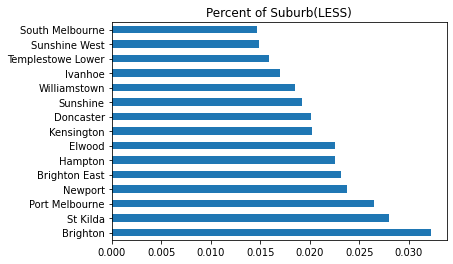

In [45]:
sub_less = coun_less_5.Suburb.value_counts()
(sub_less[:15] / coun_less_5.shape[0]).plot(kind='barh', title='Percent of Suburb(LESS)')

**BRIGHTON** has higher record which is **OVER 3%**.

### Average Price for different Suburb

<AxesSubplot:title={'center':'Average Price of Suburb(LESS)'}, ylabel='Suburb'>

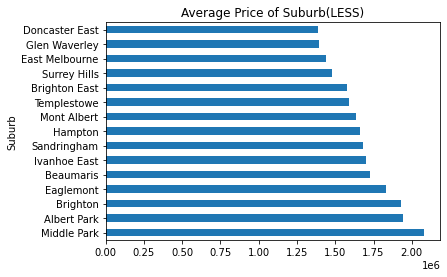

In [47]:
sub_group_less = coun_less_5.groupby(by='Suburb')['Price'].mean()
sub_group_less.sort_values(ascending=False)[:15].plot(kind='barh', title='Average Price of Suburb(LESS)')

For property which located at **Brighton** has the 3rd **HIGHEST AVERAGE PRICE**.

<a class="anchor" id="5"></a>
## What is the pattern?

According to the sales record and frequency, I use the difference percentage of **COUNCIL AREA** to divide into 2 different subsets. In those groups, I had found a pattern of this record.
> **Over 5% group**:
>> **REGION and SUBURB** - **BOTH** traded frequently areas has **LOWEST PROPERTY PRICE**.
>
> **Less 5% group**:
>> **REGION and SUBURB** - **BOTH** traded frequently areas has **HIGHEST PROPERTY PRICE**.
>

**Conclusion**: in this data, I divided data into different subsets by the **FREQUENCE** of history records, and it reveal that **PRICE** feature has a interesting pattern. Average Price of property which is **BELOW 1 MILLION** has higher probability that located in **NORTHERN** region, on the other hand, properties **PRICE ABOVE 1 MILLION** which has higher probability that located in **SOUTHERN** region.